In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv("D:\data analysis\Sample-sales-data-excel-small.csv")

In [4]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#rename product name
df.rename(columns = {"Order Date":"Order_date","Ship Date":"Ship_date","Customer Name": "Customer", "Product Name": "Products", "Sales":"Revenue"}, inplace=True)
df.head()

,Row ID,Order ID,Order_date,Ship_date,Ship Mode,Customer ID,Customer,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Products,Revenue,Quantity,Discount,Profit
0,1,CA-2016-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#max sales
high_sales = df['Revenue'].max
print(high_sales)

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      261.9600
1      731.9400
2       14.6200
3      957.5775
4       22.3680
         ...   
269     57.5760
270    725.8400
271    209.9300
272      5.2800
273     10.9200
Name: Sales, Length: 274, dtype: float64>


In [14]:
# highest sales per month
salespermonth = df.groupby(['Order_date'])['Revenue'].max().reset_index()
print(salespermonth)

     Order_date     Sales
0    01/03/2020   457.568
1    01/06/2020  2001.860
2    01/12/2017   221.550
3    01/12/2018    23.920
4    02/01/2019  1188.000
..          ...       ...
113  30/04/2019   213.115
114  30/07/2019   209.930
115  31/01/2019    53.340
116  31/05/2019   105.520
117  31/10/2019    14.280

[118 rows x 2 columns]


In [15]:
# States sales
state_sales = df.groupby('State')['Revenue'].mean().to_frame().reset_index()
print(state_sales)

             State       Sales
0          Alabama  112.450000
1          Arizona  314.746000
2       California  215.386172
3         Colorado  119.897600
4      Connecticut    7.160000
5         Delaware   79.185714
6          Florida  351.426500
7         Illinois  167.473833
8          Indiana   52.387500
9             Iowa   51.600000
10        Kentucky  496.950000
11       Louisiana  227.636667
12        Michigan  125.374000
13       Minnesota  288.305714
14        Missouri  839.430000
15        Nebraska   39.900000
16      New Jersey   26.910000
17      New Mexico   28.400000
18        New York  183.374522
19  North Carolina   50.658286
20            Ohio  132.313846
21        Oklahoma  479.775000
22          Oregon    5.682000
23    Pennsylvania  296.416000
24  South Carolina  301.960000
25       Tennessee  249.426571
26           Texas  659.923773
27            Utah  550.065000
28        Virginia   75.880000
29      Washington  337.476800
30       Wisconsin  664.738000


In [16]:
df.columns

Index(['Row ID', 'Order ID', 'Order_date', 'Ship_date', 'Ship Mode',
       'Customer ID', 'Customer', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Products', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Text(0.5, 1.0, 'Sales per state')

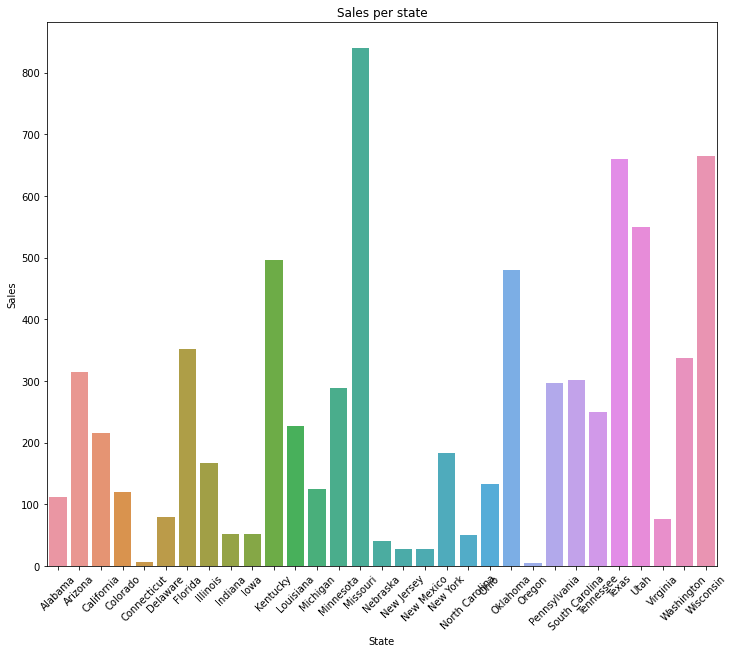

In [109]:

plt.figure(figsize=(12,10))
sns.barplot(data = state_sales, x = "State", y = "Revenue")
plt.xticks(rotation = 45)
plt.title('Sales per state')


In [15]:
#converting order_date and ship_date to date data type
df['Order_date'] = pd.to_datetime(df['Order_date'], format='%Y-%m-%d' )
df['Ship_date'] = pd.to_datetime(df['Ship_date'], format='%Y-%m-%d')

In [18]:
#calculating years
year = df['Order_date'].dt.year
print(year)

0      2018
1      2018
2      2018
3      2019
4      2019
       ... 
269    2017
270    2017
271    2019
272    2019
273    2019
Name: Order_date, Length: 274, dtype: int64


In [48]:
#difference between shipping and ordering
date_diff = df['Ship_date'] - df['Order_date']
print(date_diff)

0        3 days
1        3 days
2        4 days
3        7 days
4        7 days
         ...   
269      4 days
270   1101 days
271      1 days
272      1 days
273      1 days
Length: 274, dtype: timedelta64[ns]


In [51]:
#sorting the date descending order
df.sort_values(by='Order_date')

,Row ID,Order ID,Order_date,Ship_date,Ship Mode,Customer ID,Customer,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Products,Sales,Quantity,Discount,Profit
131,132,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,43229,East,OFF-PA-10002377,Office Supplies,Paper,Xerox 1916,78.3040,2,0.20,29.3640
130,131,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,43229,East,TEC-PH-10002293,Technology,Phones,Anker 36W 4-Port USB Wall Charger Travel Power...,59.9700,5,0.40,-11.9940
132,133,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,43229,East,OFF-FA-10002780,Office Supplies,Fasteners,Staples,21.4560,9,0.20,6.9732
231,232,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,...,33614,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.8600,2,0.45,-102.0480
232,233,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,...,33614,South,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,3,0.45,-248.2458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,CA-2014-166191,2020-12-05,2020-12-09,Second Class,DK-13150,David Kendrick,Corporate,United States,Decatur,...,62521,Central,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.7440,7,0.20,76.6395
180,181,CA-2014-166191,2020-12-05,2020-12-09,Second Class,DK-13150,David Kendrick,Corporate,United States,Decatur,...,62521,Central,OFF-ST-10003455,Office Supplies,Storage,"Tenex File Box, Personal Filing Tote with Lid,...",24.8160,2,0.20,1.8612
67,68,CA-2014-106376,2020-12-05,2020-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,...,85234,West,OFF-AR-10002671,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.0240,8,0.20,111.3024
68,69,CA-2014-106376,2020-12-05,2020-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,...,85234,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.9680,4,0.20,62.9880


In [61]:
#calculating the busiest day by sales
busy_day = df.groupby('Order_date')['Revenue'].max().reset_index().sort_values(['Revenue'], ascending=False)

print(busy_day)

    Order_date     Sales
105 2020-09-08  8159.952
46  2018-09-11  3347.370
79  2019-09-17  3083.430
108 2020-09-19  3059.982
98  2020-06-01  2001.860
..         ...       ...
73  2019-05-28     6.630
35  2018-05-11     5.980
48  2018-09-18     4.616
91  2019-12-15     3.280
6   2017-06-08     1.624

[118 rows x 2 columns]


In [60]:
#calculating slowest day by sales
slow_day = df.groupby('Order_date')['Revenue'].min().reset_index().sort_values(['Revenue'], ascending=True)

print(slow_day)

    Order_date     Sales
25  2017-12-09     1.248
6   2017-06-08     1.624
39  2018-06-17     1.680
43  2018-08-29     1.788
76  2019-08-09     2.200
..         ...       ...
29  2017-12-28   725.840
68  2019-03-02   787.530
27  2017-12-22   839.430
80  2019-09-25  1044.630
108 2020-09-19  2519.958

[118 rows x 2 columns]


In [57]:
#high shipping rate by sale
high_shipping = df.groupby('Order_date')['Revenue'].max().reset_index().sort_values(['Revenue'], ascending=False)

print(high_shipping)

    Order_date     Sales
105 2020-09-08  8159.952
46  2018-09-11  3347.370
79  2019-09-17  3083.430
108 2020-09-19  3059.982
98  2020-06-01  2001.860
..         ...       ...
73  2019-05-28     6.630
35  2018-05-11     5.980
48  2018-09-18     4.616
91  2019-12-15     3.280
6   2017-06-08     1.624

[118 rows x 2 columns]


In [63]:
# top 5 selling products
top_product = df.groupby('Products')['Revenue'].max().reset_index().sort_values(['Revenue'], ascending=False).head(5)
print(top_product)


                                              Products     Sales
131          Lexmark MX611dhe Monochrome Laser Printer  8159.952
137                 Logitech P710e Mobile Speakerphone  3347.370
177  Riverside Palais Royal Lawyers Bookcase, Royal...  3083.430
248  Xerox WorkCentre 6505DN Laser Multifunction Pr...  2519.958
92             Global Deluxe High-Back Manager's Chair  2001.860


In [7]:
# buttom 5 selling products
buttom_product = df.groupby('Products')['Revenue'].min().reset_index().sort_values(['Revenue'], ascending=True).head(5)
print(buttom_product)

                                              Products  Revenue
68                                     Economy Binders    1.248
78   Eureka Disposable Bags for Sanitaire Vibra Gro...    1.624
168                        Prang Dustless Chalk Sticks    1.680
36       Avery Hidden Tab Dividers for Binding Systems    1.788
191  Sanford Uni-Blazer View Highlighters, Chisel T...    2.200


In [10]:
#Price per unit
price_per_unit = df['Revenue'] / df['Quantity']
print(price_per_unit)

0      130.9800
1      243.9800
2        7.3100
3      191.5155
4       11.1840
         ...   
269     19.1920
270    181.4600
271     29.9900
272      1.7600
273      3.6400
Length: 274, dtype: float64


In [9]:
#Net revenue
net_revenue = (df['Quantity'] * df['Revenue']) - df['Discount']
print(net_revenue)

0       523.9200
1      2195.8200
2        29.2400
3      4787.4375
4        44.5360
         ...    
269     172.5280
270    2903.3600
271    1469.5100
272      15.8400
273      32.5600
Length: 274, dtype: float64


In [66]:
#sales volume variances.difference between projected units sold and actual units sold

sales_volume_variances = df['Quantity'] * df['Profit']
print(sales_volume_variances)

0        83.8272
1       658.7460
2        13.7428
3     -1915.1550
4         5.0328
         ...    
269      64.7730
270     841.9744
271     646.5844
272       6.9696
273      12.2850
Length: 274, dtype: float64


In [ ]:
#Sales turnover
